<a href="https://colab.research.google.com/github/AshwinDeshpande96/Conversational_Recommender_System_using_Multi-Relational_Data/blob/master/Experiments_Training_CRS_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import random

* closest vector
* closest vectors
* closest cluster
* multi-class classification
* binary per entity

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/Shareddrives/Conversational_Recommender_Systems/

In [ ]:
with open("movie_embeddings.pickle", "rb") as fp:
    movie_embeddings = pickle.load(fp)
    fp.close()

In [ ]:
len(movie_embeddings)

6428

In [ ]:
with open("dgi_entity_to_embedding.pickle", "rb") as fp:
    entity_to_embeddings = pickle.load(fp)
    fp.close()
entity_to_embeddings = {key: value.tolist() for key, value in entity_to_embeddings.items()}

In [ ]:
with open("dgi_word_to_embedding.pickle", "rb") as fp:
    word_to_embeddings = pickle.load(fp)
    fp.close()
word_to_embeddings = {key: value.tolist() for key, value in word_to_embeddings.items()}

In [ ]:
all_entities = list(entity_to_embeddings.keys())
len(all_entities)

48109

In [ ]:
all_movies = list(set(movie_embeddings.keys()).intersection(set(all_entities)))

In [ ]:
train_df = pd.read_pickle("grouped_train_df.pickle").dropna()
# train_df["input_text"] = [" ".join(tokens) for tokens in train_df.input_tokens_pad.values]
train_df.head()

,input_tokens,output_entities,ranked_output
0,"[like, watch, day, ., cool, fav, western, hila...",[http://dbpedia.org/resource/Wild_Wild_West],"[http://dbpedia.org/resource/Wild_Wild_West, h..."
1,"[nice, sounds, interesting, ., liked, really, ...",[http://dbpedia.org/resource/Adam],[http://dbpedia.org/resource/The_Inbetweeners_...
2,"[seems, bit, early, year, ., also, great, watc...","[http://dbpedia.org/resource/Ferdinand_(film),...","[http://dbpedia.org/resource/Ferdinand_(film),..."
3,"[cold, ., yeah, know, freezing, ., wanted, sug...",[http://dbpedia.org/resource/Seabiscuit_(film)],[http://dbpedia.org/resource/Seabiscuit_(film)...
4,"[funny, title, though, shall, watch, one, ., f...","[http://dbpedia.org/resource/The_Big_Sick, htt...","[http://dbpedia.org/resource/The_Big_Sick, htt..."


In [ ]:
def merge_entities(output_entities, ranked_output, top=20):
    entity_list = []
    for entity in output_entities + ranked_output:
        if len(entity_list) == top:
            break
        if entity not in entity_list and entity in entity_to_embeddings:
            entity_list.append(entity)
    return entity_list

In [ ]:
def check_tokens(tokens):
    checked_tokens = []
    for token in tokens:
        if token in word_to_embeddings:
            checked_tokens.append(token)
    return checked_tokens        

In [ ]:
train_df["input_entities"] = [merge_entities(output_entities, ranked_output)
                              for output_entities, ranked_output in train_df[["output_entities", "ranked_output"]].values]

In [ ]:
train_df["input_tokens"] = [check_tokens(input_tokens)
                              for input_tokens in train_df.input_tokens.values]

In [ ]:
train_df.head()

,input_tokens,output_entities,ranked_output,input_entities
0,"[like, watch, day, cool, fav, western, hilarious]",[http://dbpedia.org/resource/Wild_Wild_West],"[http://dbpedia.org/resource/Wild_Wild_West, h...","[http://dbpedia.org/resource/Wild_Wild_West, h..."
1,"[nice, sounds, interesting, liked, really, lau...",[http://dbpedia.org/resource/Adam],[http://dbpedia.org/resource/The_Inbetweeners_...,[http://dbpedia.org/resource/The_Inbetweeners_...
2,"[seems, bit, early, year, also, great, watch, ...","[http://dbpedia.org/resource/Ferdinand_(film),...","[http://dbpedia.org/resource/Ferdinand_(film),...","[http://dbpedia.org/resource/Ferdinand_(film),..."
3,"[cold, yeah, know, freezing, wanted, suggestio...",[http://dbpedia.org/resource/Seabiscuit_(film)],[http://dbpedia.org/resource/Seabiscuit_(film)...,[http://dbpedia.org/resource/Seabiscuit_(film)...
4,"[funny, title, though, shall, watch, one, firs...","[http://dbpedia.org/resource/The_Big_Sick, htt...","[http://dbpedia.org/resource/The_Big_Sick, htt...","[http://dbpedia.org/resource/The_Big_Sick, htt..."


In [ ]:
input_tokens = train_df.input_tokens.values
input_entities = train_df.input_entities.values
ranked_output = train_df.ranked_output.values

In [ ]:
X = []

In [ ]:
for i, x1, x2s in zip(range(len(input_tokens)), input_tokens, input_entities):
    neg_entities = list(set(all_entities).difference(set(x2s)))
    for x2 in x2s:
        neg_x2 = random.choice(neg_entities)
        X.append([i, x1, x2, neg_x2])
print(len(X))

25340


In [ ]:
X = X[:10000]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size=0.25, random_state=42)
X_train, X_val = train_test_split(X_train, test_size=0.25, random_state=42)

In [ ]:
# X_train = np.array(X_train)
# X_test = np.array(X_test)
# X_val = np.array(X_val)

# y_train = np.array(y_train)
# y_test = np.array(y_test)
# y_val = np.array(y_val)

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)
# print(X_val.shape, y_val.shape)

In [ ]:
def get_word_embeddings(sentences, emb_length=70, emb_size=128):
    embeddings = []
    for si, sentence in enumerate(sentences):
        embeddings.append([])
        for token in sentence[:emb_length]:
            embeddings[si].append(word_to_embeddings[token])
        while len(embeddings[si]) < emb_length:
            embeddings[si].append([0]*emb_size)
    # print(embeddings)
    return np.array(embeddings)
            

In [ ]:
get_word_embeddings([x[1] for x in X_train[0:3]]).shape

(3, 70, 128)

In [ ]:
def get_entity_embeddings(entities, emb_length=60):
    embeddings = []
    for entity in entities:
        if entity in entity_to_embeddings:
            embeddings.append(entity_to_embeddings[entity])
    return np.array(embeddings)

In [ ]:
get_entity_embeddings([x[2] for x in X_train[0:3]]).shape

(3, 128)

In [ ]:
batch_size = 64
def batch(_X, batch_size=32):
    n = len(_X)
    step = 0
    for start in range(0, n, batch_size):
        end = start+batch_size if start+batch_size < n else n
        step += 1
        idxs = [x[0] for x in _X[start:end]]
        word_embeddings = get_word_embeddings([x[1] for x in _X[start:end]])
        pos_entity_embedding = get_entity_embeddings([x[2] for x in _X[start:end]])
        neg_entity_embedding = get_entity_embeddings([x[3] for x in _X[start:end]])

        yield step, idxs, word_embeddings, pos_entity_embedding, neg_entity_embedding

In [ ]:
class MyLayer(tf.keras.layers.Layer):
    def __init__(self, input_shape):
        super(MyLayer, self).__init__()
        self.kernel = self.add_weight("kernel", shape=input_shape, initializer='he_normal', trainable=True)
        self.kernel2 = self.add_weight("kernel", shape=(batch_size, input_shape[0]), initializer='he_normal', trainable=True)
        self.bias = self.add_weight(name='bias', shape=(1, input_shape[0]), initializer='zeros', trainable=True)
        
    def call(self, word_embedding, entity_embedding):
        # print("word_embedding: ", word_embedding.shape)
        # print("entity_embedding: ", entity_embedding.shape)
        x = tf.matmul(word_embedding, self.kernel)
        # print("x: ", x.shape)
        entity_embedding = tf.transpose(entity_embedding)
        # print("entity_embedding: ", entity_embedding.shape)
        x = tf.matmul(x, entity_embedding)

        x = tf.matmul(x, self.kernel2)
        # print("x: ", x.shape)
        x = x + self.bias
        # print("x: ", x.shape)
        return x

In [ ]:
class MyModel(tf.keras.Model):
    def __init__(self, embedding_size):
        super().__init__()
        # self.encoder = encoder
        # self.num_outputs = num_outputs
        # self.embedding_layer = tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()), output_dim=embedding_size)
        self.lstm1 = tf.keras.layers.LSTM(embedding_size, activation='relu', dropout=0.25, return_sequences=True, return_state=True)

        self.lstm2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_size, activation='relu', dropout=0.25))


        self.fc1 = tf.keras.layers.Dense(embedding_size, activation='relu')
        self.fc2 = tf.keras.layers.Dense(embedding_size, activation='relu')
        self.fc3 = tf.keras.layers.Dense(embedding_size, activation='relu')

        self.my_layer = MyLayer([embedding_size, embedding_size])

    def call(self, x1x2):
        # x = self.encoder(input)
        # x = self.embedding_layer(x)
        # print(input.shape)
        # print(x1x2[0].shape, x1x2[1].shape)
        whole_seq_output, final_memory_state, final_carry_state = self.lstm1(x1x2[0])

        x1 = self.lstm2(whole_seq_output)

        # print(x1.shape)

        x1 = self.fc1(x1)

        # print(x1.shape)
        
        x2 = self.fc2(x1x2[1])

        # print(x1.shape, x2.shape)
        
        x = self.my_layer(x1, x2)
        
        output = tf.keras.activations.sigmoid(x)

        return output

In [ ]:
class MyModel2(tf.keras.Model):
    def __init__(self, embedding_size):
        super().__init__()
        # self.encoder = encoder
        # self.num_outputs = num_outputs
        # self.embedding_layer = tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()), output_dim=embedding_size)
        self.lstm1 = tf.keras.layers.LSTM(embedding_size, activation='relu', dropout=0.25, return_sequences=True, return_state=True)

        self.lstm2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_size, activation='relu', dropout=0.25))


        self.fc_word_1 = tf.keras.layers.Dense(embedding_size, activation='relu')
        self.fc_word_2 = tf.keras.layers.Dense(embedding_size, activation='tanh')

        self.fc_1 = tf.keras.layers.Dense(embedding_size, activation='relu')
        self.fc_2 = tf.keras.layers.Dense(embedding_size, activation='relu')
        self.fc_3 = tf.keras.layers.Dense(embedding_size, activation='tanh')

        # self.myLayer = MyLayer([embedding_size, embedding_size])


        

    def call(self, xs):
        # x = self.encoder(input)
        # x = self.embedding_layer(x)
        # print(input.shape)
        # print(x1x2[0].shape, x1x2[1].shape)
        word_input = xs[0]
        pos_ent = xs[1]
        neg_ent = xs[2]

        whole_seq_output, final_memory_state, final_carry_state = self.lstm1(word_input)

        word_x = self.lstm2(whole_seq_output)

        # print(x1.shape)

        word_x = self.fc_word_1(word_x)
        word_x = self.fc_word_2(word_x)

        # print(x1.shape)
        
        pos_x = self.fc_1(pos_ent)
        pos_x = self.fc_2(pos_x)

        pos_x = self.fc_3(pos_x)

        neg_x = self.fc_1(neg_ent)
        neg_x = self.fc_2(neg_x)
        neg_x = self.fc_3(neg_x)

        # print(x1.shape, x2.shape)
        # print(x.shape)

        return word_x, pos_x, neg_x

In [ ]:
class MIM(tf.keras.metrics.Metric):
    def __init__(self, name='binary_true_positives', **kwargs):
        super(MIM, self).__init__(name=name, **kwargs)
        self.loss = self.add_weight(name='mim', initializer='zeros')

    def update_state(self, y_pred, sample_weight=None):
        word_x, pos_x, neg_x = y_pred
        # print(word_x[0], pos_x[0], neg_x[0])
        pos_dist = word_x - pos_x
        neg_dist = word_x - neg_x

        pos_dist = tf.math.abs(pos_dist)
        neg_dist = tf.math.abs(neg_dist)

        pos_dist = tf.reduce_mean(pos_dist, 1)
        neg_dist = tf.reduce_mean(neg_dist, 1)

        total_dist = pos_dist - neg_dist

        total_dist = tf.reduce_sum(total_dist)
        

        self.loss.assign_add(total_dist)
        

    def reset_states(self):
        self.loss.assign(0)

    def result(self):
        return self.loss.numpy()
        

In [ ]:
def mim_loss(y_pred):
    word_x, pos_x, neg_x = y_pred
    pos_dist = word_x - pos_x
    neg_dist = word_x - neg_x

    pos_dist = tf.math.abs(pos_dist)
    neg_dist = tf.math.abs(neg_dist)

    pos_dist = tf.reduce_mean(pos_dist, 1)
    neg_dist = tf.reduce_mean(neg_dist, 1)

    total_dist = pos_dist - neg_dist

    total_dist = tf.reduce_sum(total_dist)

    return total_dist


In [ ]:
lr = 1e-3
optimizer=tf.keras.optimizers.Adam(lr)
loss = mim_loss
train_mim = MIM()
val_mim = MIM()
model = MyModel2(128)

In [ ]:
def create_train_step(model, lr=1e-3):
    optimizer=tf.keras.optimizers.Adam(lr)
    @tf.function
    def train_step(x):
        with tf.GradientTape() as tape:
            logits = model(x, training=True)
            loss_value = loss(logits)
                    
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        train_mim.update_state(logits)

        return loss_value

    @tf.function
    def test_step(x):
        val_logits = model(x, training=False)
        val_mim.update_state(val_logits)
    return train_step, test_step

In [ ]:
def hit_at_n(y_pred, y_true, n=10):
    y_pred = set(y_pred[:n])
    y_true = set(y_true[:n])
    score = len(y_pred.intersection(y_true))/n
    return score
def get_mrr(y_pred, y_true):
    first = y_true[0]
    y_pred = y_pred.tolist()
    rank = y_pred.index(first) + 1
    return 1/rank


In [ ]:
from pprint import pprint
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
hits = [10, 15, 20, 50, 100]
parsed_idxs = set()
def get_auc_score(idxs, top=50, total_movies=200):
    input_values = input_tokens[idxs]
    hitscores = {h:0 for h in hits}
    mrr = 0
    output_lists = []
    for movies in ranked_output[idxs]:
        output_list = movies[:top]
        output_list_neg = set(all_movies).difference(set(output_list))
        output_list_neg = random.sample(output_list_neg, total_movies-top)
        output_list += output_list_neg
        output_lists.append(output_list)
    batch_auc_score = 0
    # print(input_values.shape)
    # print(output_lists.shape)
    ranges = [[0]]
    all_predictions = []
    for x1, x2 in zip(input_values, output_lists):
        print("#"*200)
        print(x1)
        print("#"*200)
        text_input = get_word_embeddings([x1])
        movie_embeddings = get_entity_embeddings(x2)
        # print(text_input.shape, movie_embeddings.shape)
        text_input = np.vstack([text_input]*len(movie_embeddings))

        start = ranges[-1][-1]
        end = start + len(movie_embeddings)
        ranges.append([start, end])

        movie_input = [text_input, movie_embeddings, movie_embeddings]
        word_x, pos_x, neg_x = model(movie_input, training=False)
        pos_d = tf.math.squared_difference(word_x, pos_x)
        pos_d = tf.reduce_mean(pos_d, 1).numpy()

        ranked_i = np.argsort(pos_d)
        x2 = np.array(x2)
        x2pred = x2[ranked_i]
        mrr += get_mrr(x2pred, x2)
        idx = 0
        hitat100 = hit_at_n(x2pred, x2, 100)
        print(hitat100)
        if  hitat100 >= 0.15:
            for a, b in zip(x2[:50], x2pred[:50]):
                idx += 1
                print(idx, a, b, sep="\t")

        for hit in hitscores:
            hit_score = hit_at_n(x2pred, x2, hit)
            hitscores[hit] += hit_score


        all_predictions += (-1*pos_d).flatten().tolist()
        
        
    for start_i, end_i in ranges[1:]:
        predictions = all_predictions[start_i:end_i]
        gold_ranking = [1]*top + [0]*(len(predictions)-top)

        try:
            auc_score = roc_auc_score(gold_ranking, predictions)
            fpr, tpr, thresholds = roc_curve(x=gold_ranking, y=predictions, pos_label=1)
            p = sns.lineplot(fpr, tpr)
            p.set_xlabel("FPR", fontsize = 10)
            p.set_ylabel("TPR", fontsize = 10)
            # print(predictions)
            # print(gold_ranking)
        except Exception as e:
            continue
        # print("Gold:", gold_ranking)
        # print("Pred: ", predictions)
        # print("AUC:", auc_score)
        batch_auc_score += auc_score
        # pprint(dict(zip(y, predictions)))
    batch_auc_score /=len(input_values)
    hitscores = [score/len(input_values) for score in hitscores.values()]
    mrr /= len(input_values)
    scores = []
    return batch_auc_score, hitscores, mrr
        

In [ ]:
epochs = 15
best_auc = 0
patience = 0
max_patience = 10
num_decay = 5
decay_ratio = 8
history = []
train_step, test_step = create_train_step(model, lr=lr)

In [ ]:

for epoch in range(epochs):
    parsed_idxs = set()
    print(f"{'#'*60}\nEPOCH: {epoch}\n{'#'*60}")
    for step, idxs_train, x1_batch_train, pos_x2_batch_train, neg_x2_batch_train in batch(X_train):
        # print(x1_batch_train.shape, x2_batch_train.shape, y_batch_train.shape)
        x_batch_train = [x1_batch_train, pos_x2_batch_train, neg_x2_batch_train]
        train_step(x_batch_train)
    train_result = train_mim.result()
    if not isinstance(train_result, np.float32):
        train_result = train_result.numpy()
    
    print(f"Training Loss: {round(train_result, 5)}", end="\t")
    train_mim.reset_states()

    parsed_idxs = set()
    for step, idxs_val, x1_batch_val, pos_x2_batch_val, neg_x2_batch_val in batch(X_val):
        parsed_idxs.update(idxs_val)
        x_batch_val = [x1_batch_val, pos_x2_batch_val, neg_x2_batch_val]
        test_step(x_batch_val)
    epoch_auc, recalls, mrr = get_auc_score(random.sample(parsed_idxs, 5))
    history.append([epoch_auc, mrr]+recalls)
    val_result = val_mim.result()
    #   print("-"*60)
    if not isinstance(val_result, np.float32):
        val_result = val_result.numpy()
    # print("Validation Loss: %.4f \tAUC: %.4f" % (float(val_result), float(epoch_auc)))
    print(f"Validation Loss: {round(val_result, 5)}, Batch AUC: {round(epoch_auc, 5)}")
    val_mim.reset_states()
    
    if epoch_auc > best_auc:
        model.save_weights("./model_weights_distance", save_format='tf', overwrite=True)
        best_auc = epoch_auc
        patience = 0    
        print("Loss Improved!")
    else:
        patience += 1
    if patience > max_patience:
        num_decay -= 1
        if num_decay <= 0:
            break
        else:
            model.load_weights('./model_weights_distance')
            lr = lr/decay_ratio
            print("Loss not improved")
            print(f"New lr: {lr}")
            del train_step
            del test_step
            train_step, test_step = create_train_step(model, lr)
            patience = 0

In [ ]:
from matplotlib import pyplot as plt
auc_scores = [h[0] for h in history]
mrr_scores = [h[1] for h in history]
r_at10 = [h[2] for h in history]
r_at15 = [h[3] for h in history]
r_at20 = [h[4] for h in history]
r_at50 = [h[5] for h in history]
r_at100 = [h[6] for h in history]

In [ ]:
print("\t".join([str(round(sc, 3)) for sc in [np.max(auc_scores), np.mean(auc_scores), np.std(auc_scores), np.min(auc_scores), np.median(auc_scores)]]))

0.697	0.606	0.046	0.491	0.609


In [ ]:
print("\t".join([str(round(sc, 3)) for sc in [np.max(mrr_scores), np.mean(mrr_scores), np.std(mrr_scores), np.min(mrr_scores), np.median(mrr_scores)]]))

0.118	0.027	0.024	0.007	0.019


In [ ]:
print("\t".join([str(round(sc, 3)) for sc in [np.max(r_at10), np.mean(r_at10), np.std(r_at10), np.min(r_at10), np.median(r_at10)]]))

0.14	0.048	0.035	0.0	0.04


In [ ]:
print("\t".join([str(round(sc, 3)) for sc in [np.max(r_at15), np.mean(r_at15), np.std(r_at15), np.min(r_at15), np.median(r_at15)]]))

0.213	0.085	0.046	0.013	0.087


In [ ]:
print("\t".join([str(round(sc, 3)) for sc in [np.max(r_at20), np.mean(r_at20), np.std(r_at20), np.min(r_at20), np.median(r_at20)]]))

0.25	0.122	0.053	0.03	0.11


In [ ]:
print("\t".join([str(round(sc, 3)) for sc in [np.max(r_at50), np.mean(r_at50), np.std(r_at50), np.min(r_at50), np.median(r_at50)]]))

0.424	0.326	0.043	0.24	0.326


In [ ]:
print("\t".join([str(round(sc, 3)) for sc in [np.max(r_at100), np.mean(r_at100), np.std(r_at100), np.min(r_at100), np.median(r_at100)]]))

0.584	0.536	0.025	0.486	0.533


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'AUC')

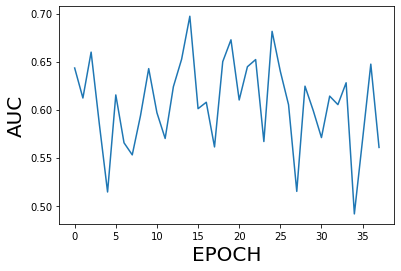

In [ ]:
import seaborn as sns
p = sns.lineplot(range(len(auc_scores)), auc_scores)
p.set_xlabel("EPOCH", fontsize = 20)
p.set_ylabel("AUC", fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'MRR')

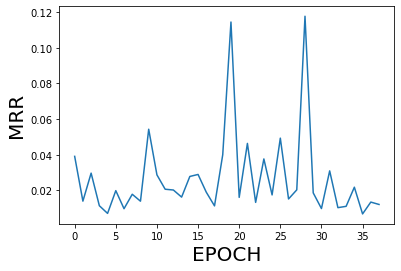

In [ ]:
import seaborn as sns
p = sns.lineplot(range(len(history)), mrr_scores)
p.set_xlabel("EPOCH", fontsize = 20)
p.set_ylabel("MRR", fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Recall@10')

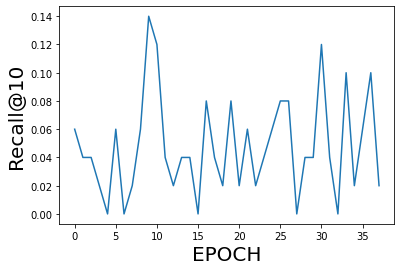

In [ ]:
import seaborn as sns
p = sns.lineplot(range(len(history)), r_at10)
p.set_xlabel("EPOCH", fontsize = 20)
p.set_ylabel("Recall@10", fontsize = 20)

In [ ]:
import seaborn as sns
p = sns.lineplot(list(range(epochs)), r_at15)
p.set_xlabel("EPOCH", fontsize = 20)
p.set_ylabel("Recall@15", fontsize = 20)

In [ ]:
import seaborn as sns
p = sns.lineplot(list(range(epochs)), r_at20)
p.set_xlabel("EPOCH", fontsize = 20)
p.set_ylabel("Recall@20", fontsize = 20)

In [ ]:
import seaborn as sns
p = sns.lineplot(list(range(epochs)), r_at50)
p.set_xlabel("EPOCH", fontsize = 20)
p.set_ylabel("Recall@50", fontsize = 20)

In [ ]:
import seaborn as sns
p = sns.lineplot(list(range(epochs)), r_at100)
p.set_xlabel("EPOCH", fontsize = 20)
p.set_ylabel("Recall@100", fontsize = 20)

In [ ]:
model.load_weights('./model_weights_distance')

In [ ]:
import warnings
warnings.simplefilter('always', category=UserWarning)

In [ ]:
from pprint import pprint
all_idxs = set([x[0] for x in X_test])
num_trial = 3
sizes = [5, 10, 15, 20]
size_to_score = {s: {"auc": [],
                        "mrr": [],
                        "r@10": [],
                        "r@15": [],
                        "r@20": [],
                        "r@50": [],
                        "r@100": []
                        } for s in sizes}
for size in sizes:
    print("Size: ", size)
    random.seed(0)
    for _ in range(num_trial):
        idxs_test = random.sample(all_idxs, size)
        _auc, recall, _mrr =  get_auc_score(idxs_test, top=50, total_movies=2000)
        size_to_score[size]["auc"].append(_auc)
        size_to_score[size]["mrr"].append(_mrr)
        size_to_score[size]["r@10"].append(recall[0])
        size_to_score[size]["r@15"].append(recall[1])
        size_to_score[size]["r@20"].append(recall[2])
        size_to_score[size]["r@50"].append(recall[3])
        size_to_score[size]["r@100"].append(recall[4])
    for key in size_to_score[size]:
        print(key, 
              np.min(size_to_score[size][key]), 
              np.median(size_to_score[size][key]),
              np.max(size_to_score[size][key]),
              np.mean(size_to_score[size][key]),
              np.std(size_to_score[size][key]))
    

In [ ]:
idxs_test = random.sample(all_idxs, 5)
get_auc_score(idxs_test, top=50, total_movies=2000)

########################################################################################################################################################################################################
['got', 'ideas', 'love', 'series', 'know', 'seen', 'first', 'two', 'good', 'ok', 'tried', 'hard', 'many', 'stars', 'liked', 'action', 'though', 'heard', 'kind', 'bit', 'get', 'pg', 'also', 'liked', 'pretty', 'funny', 'exciting']
########################################################################################################################################################################################################
0.16
1	http://dbpedia.org/resource/Hot_Fuzz	http://dbpedia.org/resource/The_Duchess_(film)
2	http://dbpedia.org/resource/Big_Talk_Productions	http://dbpedia.org/resource/Bourne_(franchise)
3	http://dbpedia.org/resource/Nanny_McPhee_and_the_Big_Bang	http://dbpedia.org/resource/Jersey_Boys_(film)
4	http://dbpedia.org/resource/Dead_Man_Walking_(film)	http://dbpedia.org/

(0.0, [0.0, 0.0, 0.01, 0.027999999999999997, 0.068], 0.002249727032612599)